In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\ROHITH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import Data

In [2]:
df = pd.read_excel("oneplus8t_reviews.xlsx")

In [3]:
df.head()

,product,title,rating,review_body
0,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",Disappointing service by Amazon,1.0,This review is about the big blunder done by O...
1,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",Poor screen quality,1.0,"This is not a ranting review, it's friendly ad..."
2,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",Don't Fall on Youtubers Review,1.0,1. No call recording feature2. Can't zoom on n...
3,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",First experience shifting to OnePlus,2.0,1) Got this device delivered yesterday and it ...
4,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",Great Mobile from OnePlus!,5.0,This is my first OnePlus mobile so I can't com...


Here we have the title and review_body which in the context of NLP, we can append them to form the final review, since both can be used to analyse the sentiment of the same verfied purchased customer.

In [4]:
df['Reviews'] = df['title'] +" "+ df['review_body']
df = df.drop(['title'],axis=1)
df = df.drop(['review_body'],axis=1)
df.head()

,product,rating,Reviews
0,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",1.0,Disappointing service by Amazon This review is...
1,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",1.0,Poor screen quality This is not a ranting revi...
2,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",1.0,Don't Fall on Youtubers Review 1. No call reco...
3,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",2.0,First experience shifting to OnePlus 1) Got th...
4,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",5.0,Great Mobile from OnePlus! This is my first On...


## Overview of the Data

In [5]:
print("Summary statisics of numerical features : \n", df.describe())

print("=======================================================================")

print("\nTotal number of reviews: ",len(df))

print("=======================================================================")

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(df[df['rating']==3]["Reviews"].count()/len(df)*100))

print("=======================================================================")

print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
    .format(df[df['rating']>3]["Reviews"].count()/len(df)*100))

print("=======================================================================")

print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(df[df['rating']<3]["Reviews"].count()/len(df)*100))
print("=======================================================================")


Summary statisics of numerical features : 
             rating
count  3019.000000
mean      3.984432
std       1.413073
min       1.000000
25%       3.000000
50%       5.000000
75%       5.000000
max       5.000000

Total number of reviews:  3019

Percentage of reviews with neutral sentiment : 7.68%

Percentage of reviews with positive sentiment : 74.40%

Percentage of reviews with negative sentiment : 17.89%


## Visualization of the data


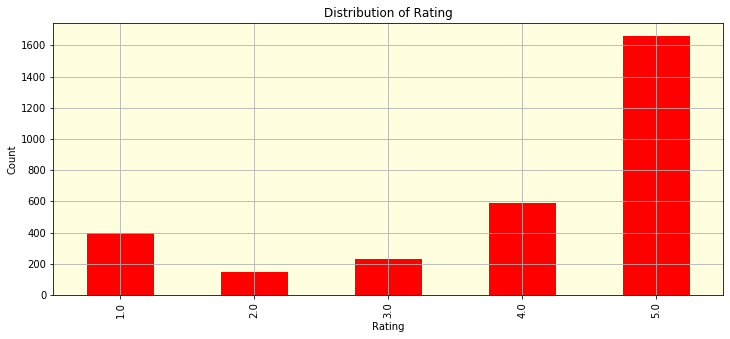

In [6]:
plt.figure(figsize=(12,5))
# sns.countplot(df['Rating'])
df['rating'].value_counts().sort_index().plot(kind='bar',color = 'red')
plt.title('Distribution of Rating')
plt.grid()
plt.xlabel('Rating')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor("lightyellow")

From the above plot we can see that most of the customers rated the oneplus 8t product with 5 star followed by 4 star.Even the sum of all the other ratings is less than total number of 5 star ratings.

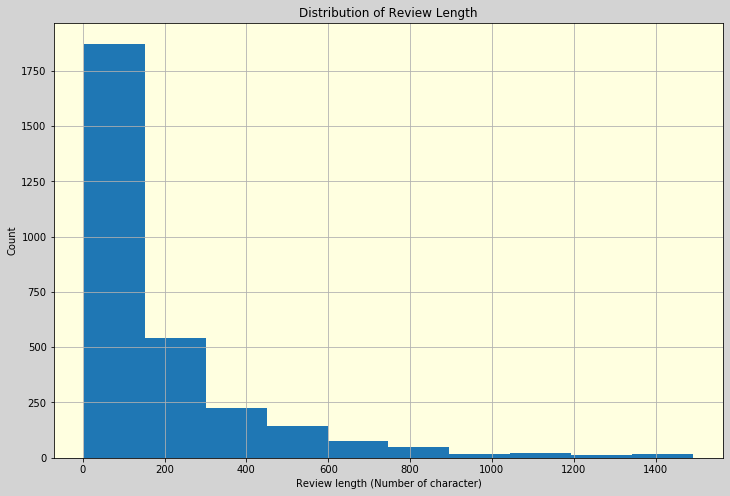

In [7]:
review_length = df["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8),facecolor='lightgrey')
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor("lightyellow")

From the above plot it is evident that most of reviews are of small length approximately between 0 to 400 characters.

## Data Preparation

In [8]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['rating'] != 3]

# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['rating'] > 3, 1, 0)
df.head()

,product,rating,Reviews,Sentiment
0,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",1.0,Disappointing service by Amazon This review is...,0
1,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",1.0,Poor screen quality This is not a ranting revi...,0
2,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",1.0,Don't Fall on Youtubers Review 1. No call reco...,0
3,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",2.0,First experience shifting to OnePlus 1) Got th...,0
4,"OnePlus 8T 5G (Aquamarine Green, 12GB RAM, 256...",5.0,Great Mobile from OnePlus! This is my first On...,1


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiment'], \
                                                    test_size=0.1, random_state=0)
print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 2507 training examples and 279 validation examples. 

Show a review in the training set : 
 Awesome Awesome👍


(3000                    Awesome Experience Just loved it.
 464     Battery issues I havs been a a constant custom...
 2646                      Performance Awesome performance
 2742                 superb truly satisfied best in class
 1128         Good mobile Camara not justify, poor battery
                               ...                        
 851     Call Recorder Not Available Superrb Power And ...
 930     Loving it My 1st OnePlus device built quality ...
 1820    Good Mobile edge and camera should have been i...
 2823    Performance Beast One plus continues its legac...
 2965       Best quality in lower price. Like. worldclass.
 Name: Reviews, Length: 2507, dtype: object, 3000    1
 464     0
 2646    1
 2742    1
 1128    1
        ..
 851     1
 930     1
 1820    1
 2823    1
 2965    1
 Name: Sentiment, Length: 2507, dtype: int32)

## Text Preprocessing

In [10]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

In [11]:
def cleanText(raw_text,remove_stopwords=False, stemming=False ,split_text=False):
    
    #convert a raw review to a cleaned review
    
    #remove html tags using BeautifulSoup
    text = BeautifulSoup(raw_text,'html.parser').get_text()
    
    #remove non-character such as digits and symbols
    letters_only = re.sub("[^a-zA-Z]"," ",text)
    
    #convert to lowercase
    words = letters_only.lower().split() 
    
    #remove stopword
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    #convert to root words by stemming is needed
    if stemming==True:
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]
    if split_text==True:
        return(words)
    
    return(" ".join(words))

In [12]:
from nltk import sent_tokenize, word_tokenize, pos_tag
import logging
from wordcloud import WordCloud
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

In [13]:
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 awesome awesome


## CountVectorizer with Multinomial Naive Bayes(Benchmark Model)

In [14]:
#CountVectorisation 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
countVect = CountVectorizer()
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features: %d \n"%len(countVect.get_feature_names()))
print("Show some features names : \n", countVect.get_feature_names()[::1000])

Number of features: 5092 

Show some features names : 
 ['aa', 'corners', 'half', 'nt', 'shitty', 'work']


In [15]:
#Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect,y_train)      

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
#Saving the CountVector
import pickle
pickle.dump(countVect,open('countVect.pkl','wb'))

In [17]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score

def modelEvaluation(predictions):
    
    #Print model evaluation to predicted result
    
    print("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test,predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [18]:
#Predicting the result
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9140

AUC score : 0.8185

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.66      0.76        58
           1       0.92      0.98      0.95       221

    accuracy                           0.91       279
   macro avg       0.91      0.82      0.85       279
weighted avg       0.91      0.91      0.91       279


Confusion Matrix : 
 [[ 38  20]
 [  4 217]]


In [19]:
#saving the model
pickle.dump(mnb,open('Naive_Bayes_model.pkl','wb'))

## TfidfVectorizer with Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names()))
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

Number of features : 1480 

Show some feature names : 
 ['10', 'priced']


In [21]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['not' 'worst' 'bad' 'poor' 'don' 'disappointed' 'hanging' 'waste'
 'pathetic' 'getting']

Top 10 features with largest coefficients : 
['good' 'best' 'awesome' 'nice' 'excellent' 'great' 'amazing' 'smooth'
 'superb' 'super']


In [23]:
#Predictions
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9068

AUC score : 0.7949

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.60      0.73        58
           1       0.90      0.99      0.94       221

    accuracy                           0.91       279
   macro avg       0.91      0.79      0.84       279
weighted avg       0.91      0.91      0.90       279


Confusion Matrix : 
 [[ 35  23]
 [  3 218]]


In [24]:
#Using GridSearchCV to find the best parameters

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.pipeline import Pipeline
estimators = [("tfidf",TfidfVectorizer()),("lr",LogisticRegression())]
model = Pipeline(estimators)

params = {"lr__C":[0.1,1,10],
         "tfidf__min_df":[1,5],
         "tfidf__max_features": [1000,None],
         "tfidf__ngram_range": [(1,1),(1,2)],
         "tfidf__stop_words": [None,"english"]}

grid = GridSearchCV(estimator=model,param_grid=params, scoring="accuracy",n_jobs=-1)
grid.fit(X_train_cleaned,y_train)
print("The best parameter set is : \n",grid.best_params_)

#Evaluation on the validation test
predictions = grid.predict(X_test_cleaned)
modelEvaluation(predictions)

The best parameter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': None}

Accuracy on validation set: 0.9140

AUC score : 0.8313

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.69      0.77        58
           1       0.92      0.97      0.95       221

    accuracy                           0.91       279
   macro avg       0.90      0.83      0.86       279
weighted avg       0.91      0.91      0.91       279


Confusion Matrix : 
 [[ 40  18]
 [  6 215]]


In [25]:
from sklearn.externals import joblib
joblib.dump(grid.best_estimator_, 'LogisticModel.pkl')

C:\Users\ROHITH\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['LogisticModel.pkl']

In [26]:
joblib_model = joblib.load('LogisticModel.pkl')
joblib_model

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

## Word2Vec

In [27]:
#Parsing review text to sentences as Word2Vec model takes a list of sentences as inputs
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    
    raw_sentences =tokenizer.tokenize(review.strip())
    sentences=[]
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence,remove_stopwords,split_text=True))
    return sentences
    
#parse each review in the training set into sentences 
sentences=[]
for review in X_train_cleaned:
    sentences += parseSent(review,tokenizer,remove_stopwords=False)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[11])

2501 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['gst', 'return', 'product', 'is', 'nice', 'but', 'we', 'have', 'not', 'received', 'gst', 'return', 'claim']


### Create Vocabulary List using Word2Vec Model

In [28]:
#embedding dimension
num_features = 300
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index2word)) #4016 
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 925 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['the', 'is', 'and', 'phone', 'i', 'it', 'a', 'to', 'good', 'camera']


### Averaging Features Vectors

In [29]:
#Transform a review to a feature vector by averaging feature vectors of words appeared in that review & that vocabulary created
def makeFeatureVec(review,model,num_features):
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #index2word is the vocabulary list of the word2Vec model 
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec

In [30]:
#Transform all reviews to feature vectors using makeFeatureVec()
def getAvgFeatureVecs(reviews, model, num_features):
    
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [31]:
X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Get feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

Training set : 2507 feature vectors with 300 dimensions
Validation set : 279 feature vectors with 300 dimensions


## Random Forest Classifer

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions)


Accuracy on validation set: 0.8495

AUC score : 0.7142

Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.48      0.57        58
           1       0.87      0.95      0.91       221

    accuracy                           0.85       279
   macro avg       0.79      0.71      0.74       279
weighted avg       0.84      0.85      0.84       279


Confusion Matrix : 
 [[ 28  30]
 [ 12 209]]


## LSTM

In [33]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [34]:
top_words = 20000
maxlen = 100 
batch_size = 32
nb_classes = 2
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape)
print("========================================")
print('X_test shape:', X_test_seq.shape)
print("========================================")
print('y_train shape:', y_train_seq.shape)
print("========================================")
print('y_test shape:', y_test_seq.shape)
print("========================================")

X_train shape: (2507, 100)
X_test shape: (279, 100)
y_train shape: (2507, 2)
y_test shape: (279, 2)


In [35]:
model1 = Sequential()
model1.add(Embedding(top_words, 128, dropout=0.2))
model1.add(LSTM(128, dropout_W=0.2, dropout_U=0.2)) 
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

# Compile LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)

# Model evluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 2,691,842
Trainable params: 2,691,842
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/3
2507/2507 [==============================] - 9s 4ms/step

In [36]:
model1.layers[0].get_weights()[0]
print("Size of weight matrix in the embedding layer : ", \
      model1.layers[0].get_weights()[0].shape)

# get weight matrix of the hidden layer
print("Size of weight matrix in the hidden layer : ", \
      model1.layers[1].get_weights()[0].shape)

# get weight matrix of the output layer
print("Size of weight matrix in the output layer : ", \
      model1.layers[2].get_weights()[0].shape)

Size of weight matrix in the embedding layer :  (20000, 128)
Size of weight matrix in the hidden layer :  (128, 512)
Size of weight matrix in the output layer :  (128, 2)


## LSTM with Word2Vec Embedding

In [37]:
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")

embedding_matrix = w2v.wv.syn0 
print("Shape of embedding matrix : ", embedding_matrix.shape)

Shape of embedding matrix :  (925, 300)


In [38]:
top_words = embedding_matrix.shape[0] 
maxlen = 100 
batch_size = 32
nb_classes = 2
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpus
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape)
print("========================================")
print('X_test shape:', X_test_seq.shape)
print("========================================")
print('y_train shape:', y_train_seq.shape)
print("========================================")
print('y_test shape:', y_test_seq.shape)
print("========================================")

X_train shape: (2507, 100)
X_test shape: (279, 100)
y_train shape: (2507, 2)
y_test shape: (279, 2)


In [39]:
embedding_layer = Embedding(embedding_matrix.shape[0],
                            embedding_matrix.shape[1], 
                            weights=[embedding_matrix])

model2 = Sequential()
model2.add(embedding_layer)
model2.add(LSTM(128, dropout_W=0.2, dropout_U=0.2)) 
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         277500    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 497,406
Trainable params: 497,406
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile model
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X_train_seq, y_train_seq, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)


# Model evaluation
score = model2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/3
2507/2507 [==============================] - 7s 3ms/step - loss: 0.4512 - accuracy: 0.8117: 0s - loss: 0.4547 - accura
Epoch 2/3
2507/2507 [==============================] - 8s 3ms/step - loss: 0.3194 - accuracy: 0.8787
Epoch 3/3
279/279 [==============================] - 0s 1ms/step
Test loss : 0.2378
Test accuracy : 0.9104


## Wordcloud

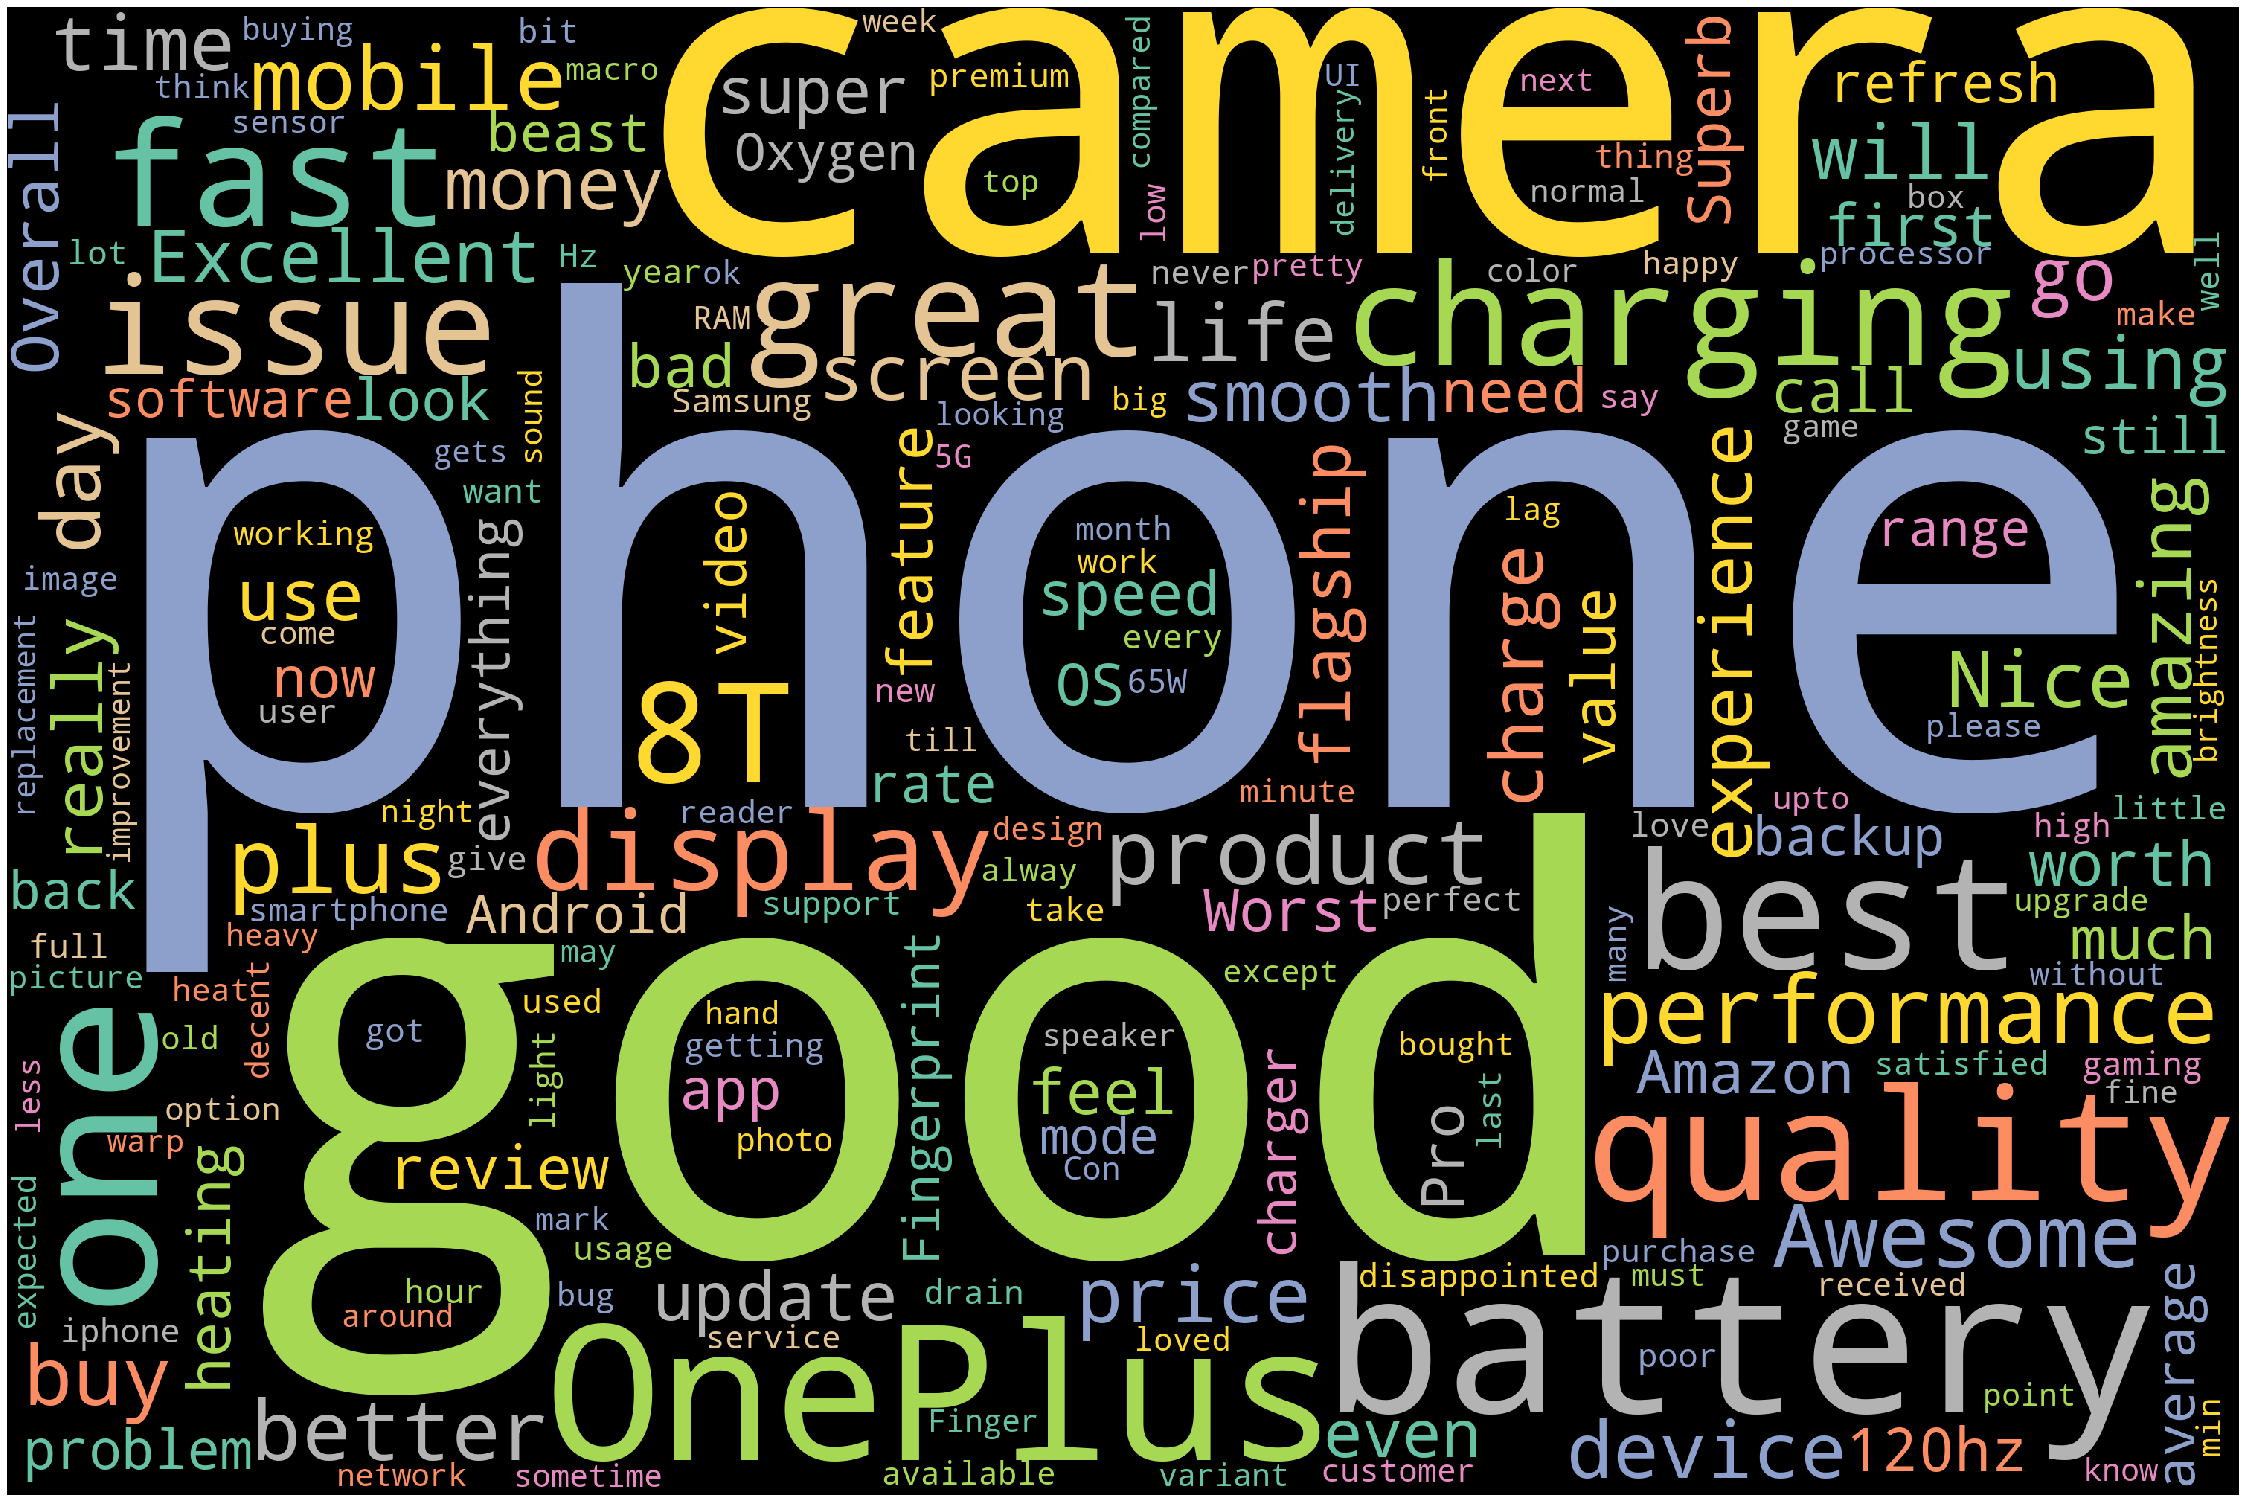

In [18]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
text_reviews=" ".join(df["Reviews"])
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
from wordcloud import WordCloud, STOPWORDS

# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=2, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text_reviews)
# Plot
plot_cloud(wordcloud)